# Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
import warnings 
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest 

# Data Collecting

In [2]:
df = pd.read_csv(r"E:\Data Science\Datasets\E-commerce.csv",encoding='ISO-8859-1')

# DataSet Overview

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Summary statistics

In [5]:
#For numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
#For categorical values
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


## Data Cleaning & Transformation

In [7]:
#Determine percentage of missing values
missing_data=df.isnull().sum()
missing_data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
missing_perc=(missing_data[missing_data>0]/df.shape[0])*100
missing_perc

Description     0.268311
CustomerID     24.926694
dtype: float64

In [9]:
missing_perc.sort_values(ascending=True,inplace=True)

(0.0, 100.0)

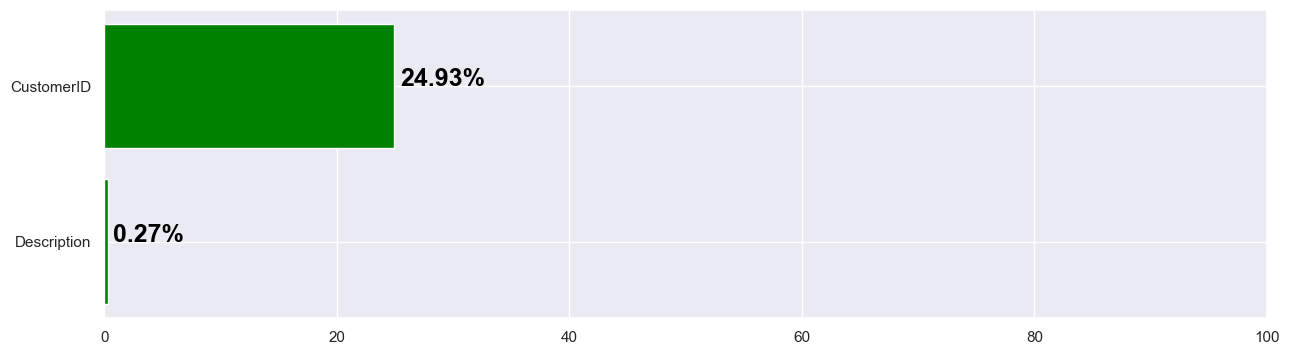

In [10]:
fig,ax = plt.subplots(figsize=(15,4))
ax.barh(missing_perc.index,missing_perc.values,color='green')
for _,(value,name) in enumerate(zip(missing_perc.values,missing_perc.index)):
    ax.text(value+0.5,name,f'{round(value,2)}%',fontsize=18,color='black',fontweight='bold')
ax.set_xlim([0,100])

In [11]:
#Drop Null values of customerid,description
df.dropna(subset=['CustomerID','Description'],inplace=True)

In [12]:
#Check if null is handled
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
#Detect duplicated
df.duplicated().sum()

5225

In [14]:
#Remove Duplicates
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
#We Found Earlier a cancelled transictions and uncomplete one from describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


In [17]:
df['TransactionStatus'] = np.where(df['InvoiceNo'].str.startswith('C'),'Cancelled','Completed')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [18]:
df[df['TransactionStatus']=='Cancelled'].describe().drop(columns='CustomerID')

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [19]:
#Percentage of cancelled transactions
(df[df['TransactionStatus']=='Cancelled'].shape[0]/df.shape[0])*100

2.209141343213713

In [20]:
#Discover the stockcodes
df.StockCode.nunique()

3684

In [21]:
df_top10_stocks = df.StockCode.value_counts().sort_values(ascending=False).head(10).index.to_list()
df_top10_stocks

['85123A',
 '22423',
 '85099B',
 '47566',
 '84879',
 '20725',
 '22720',
 'POST',
 '22197',
 '23203']

<Axes: xlabel='StockCode', ylabel='count'>

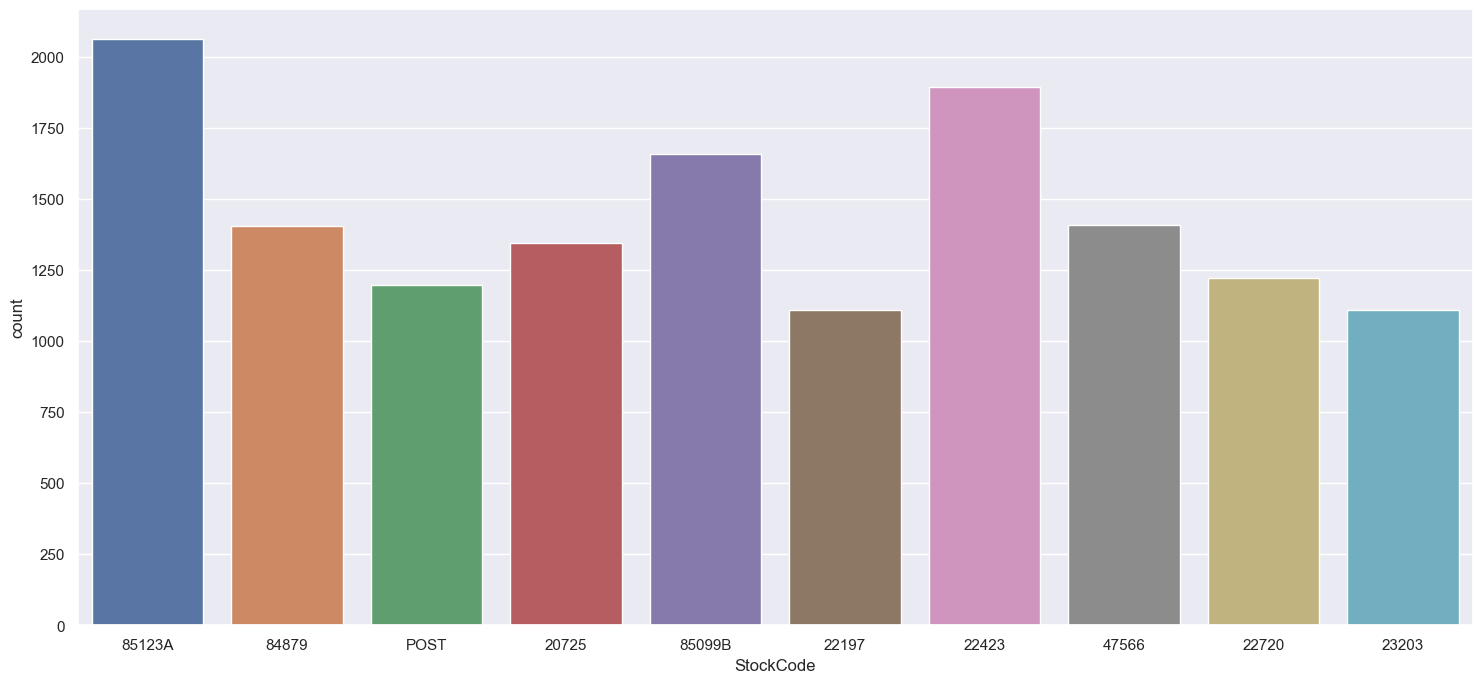

In [22]:
sns.countplot(data=df,x=df[df['StockCode'].isin(df_top10_stocks)]['StockCode'])
#We found 85123A has the most sales

In [23]:
unique_stock_codes = df['StockCode'].unique()
unique_stock_codes

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [24]:
#Non-numeric codes does not indicat products (service or something else)

In [25]:
pd.Series(unique_stock_codes).apply(lambda x : sum(c.isdigit() for c in str(x))).value_counts()

5    3676
0       7
1       1
Name: count, dtype: int64

In [26]:
#Exctract anomalis stock codes
an_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0,1) ]
for code in an_codes:
    print(code)

POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [27]:
#Get rid of anomalies stock codes
df=df[~df['StockCode'].isin(an_codes)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [28]:
#Handling Descreptions

In [29]:
#Top 30 Descreptions
df.Description.value_counts().head(30)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
PAPER CHAIN KIT 50'S CHRISTMAS        1013
LUNCH BAG SPACEBOY DESIGN             1006
LUNCH BAG CARS BLUE                   1000
HEART OF WICKER SMALL                  990
NATURAL SLATE HEART CHALKBOARD         989
JAM MAKING SET WITH JARS               966
LUNCH BAG PINK POLKADOT                961
LUNCH BAG SUKI DESIGN                  932
ALARM CLOCK BAKELIKE RED               917
REX CASH+CARRY JUMBO SHOPPER           900
WOODEN PICTURE FRAME WHITE FINISH      900
JUMBO BAG PINK POLKADOT                897
SET OF 4 PANTRY JELLY MOULDS           890

In [30]:
df.Description.value_counts().head(30).index

Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'PARTY BUNTING',
       'ASSORTED COLOUR BIRD ORNAMENT', 'LUNCH BAG RED RETROSPOT',
       'SET OF 3 CAKE TINS PANTRY DESIGN ', 'LUNCH BAG  BLACK SKULL.',
       'PACK OF 72 RETROSPOT CAKE CASES', 'SPOTTY BUNTING',
       'PAPER CHAIN KIT 50'S CHRISTMAS ', 'LUNCH BAG SPACEBOY DESIGN ',
       'LUNCH BAG CARS BLUE', 'HEART OF WICKER SMALL',
       'NATURAL SLATE HEART CHALKBOARD ', 'JAM MAKING SET WITH JARS',
       'LUNCH BAG PINK POLKADOT', 'LUNCH BAG SUKI DESIGN ',
       'ALARM CLOCK BAKELIKE RED ', 'REX CASH+CARRY JUMBO SHOPPER',
       'WOODEN PICTURE FRAME WHITE FINISH', 'JUMBO BAG PINK POLKADOT',
       'SET OF 4 PANTRY JELLY MOULDS', 'LUNCH BAG APPLE DESIGN',
       'BAKING SET 9 PIECE RETROSPOT ', 'RECIPE BOX PANTRY YELLOW DESIGN',
       'JAM MAKING SET PRINTED', 'LUNCH BAG WOODLAND',
       'ROSES REGENCY TEACUP AND SAUCER ', 'VICTORIAN GLASS HANGING T-LIGHT'],
      dt

In [31]:
df_description_top30 = df[df['Description'].isin(df.Description.value_counts().head(30).index)]
df_description_top30

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,Completed
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom,Completed
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,Completed
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541871,581585,22178,VICTORIAN GLASS HANGING T-LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,Completed
541875,581585,84879,ASSORTED COLOUR BIRD ORNAMENT,16,12/9/2011 12:31,1.69,15804.0,United Kingdom,Completed
541880,581585,22727,ALARM CLOCK BAKELIKE RED,4,12/9/2011 12:31,3.75,15804.0,United Kingdom,Completed
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,12/9/2011 12:50,3.75,12680.0,France,Completed


[Text(0, 0, '2058'),
 Text(0, 0, '1894'),
 Text(0, 0, '1659'),
 Text(0, 0, '1409'),
 Text(0, 0, '1405'),
 Text(0, 0, '1345'),
 Text(0, 0, '1224'),
 Text(0, 0, '1099'),
 Text(0, 0, '1062'),
 Text(0, 0, '1026'),
 Text(0, 0, '1013'),
 Text(0, 0, '1006'),
 Text(0, 0, '1000'),
 Text(0, 0, '990'),
 Text(0, 0, '989'),
 Text(0, 0, '966'),
 Text(0, 0, '961'),
 Text(0, 0, '932'),
 Text(0, 0, '917'),
 Text(0, 0, '900'),
 Text(0, 0, '900'),
 Text(0, 0, '897'),
 Text(0, 0, '890'),
 Text(0, 0, '890'),
 Text(0, 0, '885'),
 Text(0, 0, '883'),
 Text(0, 0, '883'),
 Text(0, 0, '850'),
 Text(0, 0, '844'),
 Text(0, 0, '843')]

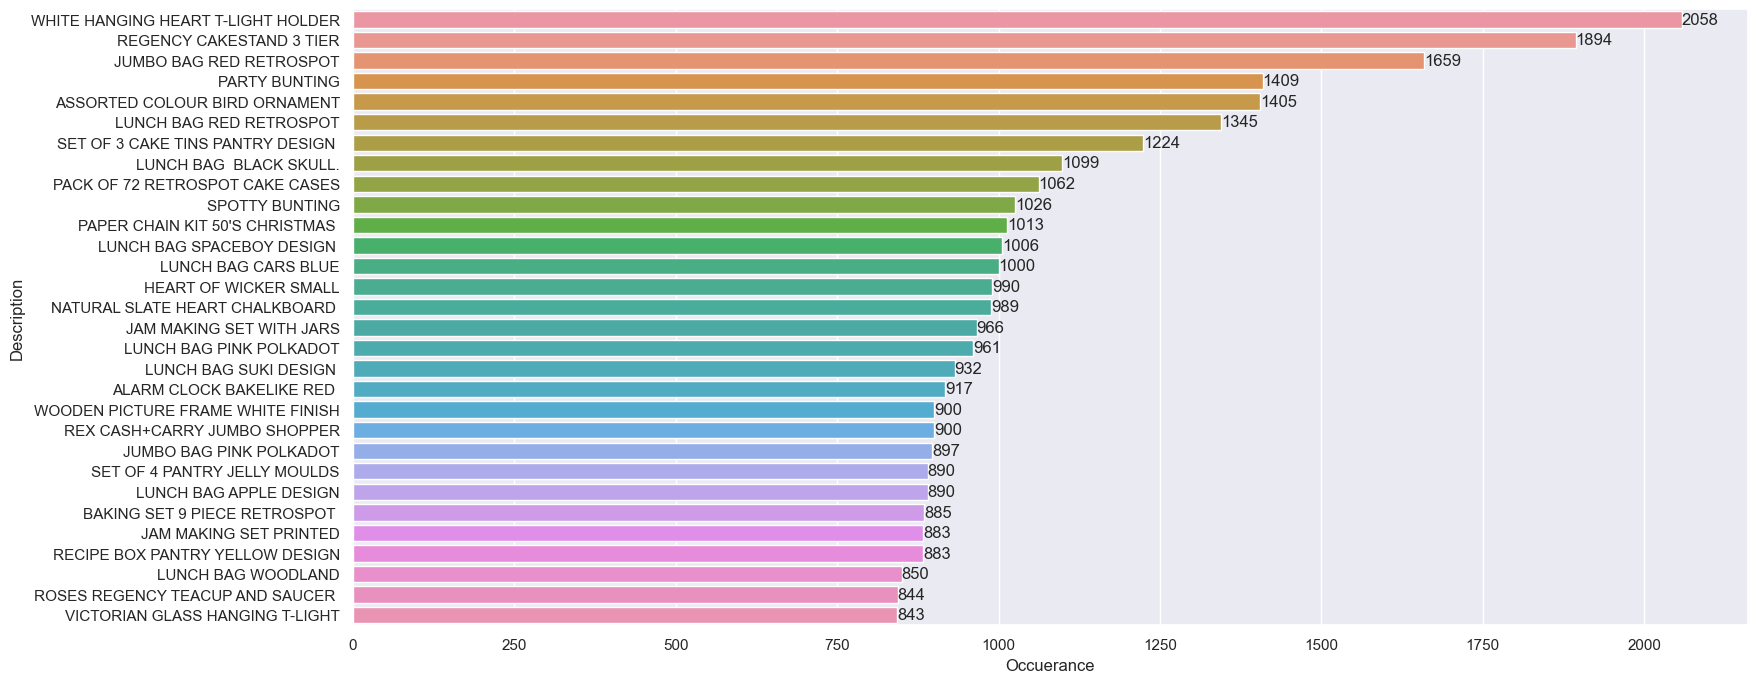

In [32]:
c=sns.countplot(data=df_description_top30,y='Description',order=df_description_top30.Description.value_counts().index)
c.set_xlabel('Occuerance')
c.bar_label(container=c.containers[0],labels=df_description_top30.Description.value_counts().head(30).values)

In [33]:
un_des=df['Description'].unique()
un_des

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [34]:
#It seems that the discription is upper case, search for anomalies descriptions
lower = [i for i in un_des if any(j.islower() for j in i)]
lower

['BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'Next Day Carriage',
 'THE KING GIFT BAG 25x24x12cm',
 'High Resolution Image']

In [35]:
#'Next Day Carriage','High Resolution Image' Is not products
df= df[~df['Description'].isin(['Next Day Carriage','High Resolution Image'])]
df['Description'] = df['Description'].apply(lambda x: x.upper())

In [36]:
lower

['BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'Next Day Carriage',
 'THE KING GIFT BAG 25x24x12cm',
 'High Resolution Image']

In [37]:
new_lower = [i for i in df['Description'].unique() if any(j.islower() for j in i)]
new_lower
#No lower Cases

[]

In [38]:
#Trating Zero unit prices
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [39]:
df[df['UnitPrice']==0]['Quantity'].describe()

count       33.000000
mean       420.515152
std       2176.713608
min          1.000000
25%          2.000000
50%         11.000000
75%         36.000000
max      12540.000000
Name: Quantity, dtype: float64

In [40]:
#Remove Noise data entry
df = df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [41]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus


In [42]:
df.reset_index(drop=True,inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


## Feature Engineering

In [43]:
#RFM Feature
#1)Recency (Days since last purchase)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [44]:
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 399573 entries, 0 to 399572
Series name: InvoiceDate
Non-Null Count   Dtype 
--------------   ----- 
399573 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [45]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 399573 entries, 0 to 399572
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
399573 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 MB


In [46]:
df['InvoiceDay'] = df['InvoiceDate'].dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01


In [47]:
customer_data = df.groupby('CustomerID')[['InvoiceDay']].max().reset_index()
customer_data

,CustomerID,InvoiceDay
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4357,18280.0,2011-03-07
4358,18281.0,2011-06-12
4359,18282.0,2011-12-02
4360,18283.0,2011-12-06


In [48]:
last_pur=df['InvoiceDay'].max()
last_pur

datetime.date(2011, 12, 9)

In [49]:
df['InvoiceDay'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 399573 entries, 0 to 399572
Series name: InvoiceDay
Non-Null Count   Dtype 
--------------   ----- 
399573 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [50]:
df['InvoiceDay'] = pd.to_datetime(df['InvoiceDay'])
df['InvoiceDay'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 399573 entries, 0 to 399572
Series name: InvoiceDay
Non-Null Count   Dtype         
--------------   -----         
399573 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 MB


In [51]:
customer_data['Days_Since_Last_Purchase'] = ((last_pur-customer_data['InvoiceDay'])/np.timedelta64(1,'D')).astype(int)
customer_data[['Days_Since_Last_Purchase']]

,Days_Since_Last_Purchase
0,325
1,2
2,75
3,18
4,310
...,...
4357,277
4358,180
4359,7
4360,3


In [52]:
customer_data.drop(columns=['InvoiceDay'],inplace=True)
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [53]:
#2)Frequency (Total Transactions,Total products purchased)
customer_data['Total_Transactions']=df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNo':'Total_Transactions'})['Total_Transactions']
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions
0,12346.0,325,2
1,12347.0,2,7
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,310,1
...,...,...,...
4357,18280.0,277,1
4358,18281.0,180,1
4359,18282.0,7,3
4360,18283.0,3,16


In [54]:
customer_data['Total_Products_Purchased']=df.groupby('CustomerID')['Quantity'].sum().reset_index().rename(columns={'Quantity':'Total_Products_Purchased'})['Total_Products_Purchased']

In [55]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


In [56]:
#3)Monetary (Total spend,Average value for each transcation)
df['Order_Value']=df.apply(lambda x: x['UnitPrice']*x['Quantity'],axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionStatus,InvoiceDay,Order_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34


In [57]:
customer_data['Total_Spend']=df.groupby('CustomerID')['Order_Value'].sum().reset_index()['Order_Value']
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend
0,12346.0,325,2,0,0.00
1,12347.0,2,7,2458,4310.00
2,12348.0,75,4,2332,1437.24
3,12349.0,18,1,630,1457.55
4,12350.0,310,1,196,294.40
...,...,...,...,...,...
4357,18280.0,277,1,45,180.60
4358,18281.0,180,1,54,80.82
4359,18282.0,7,3,98,176.60
4360,18283.0,3,16,1355,2039.58


In [58]:
customer_data['Average_Transaction_Value'] = customer_data.apply(
    lambda x: x['Total_Spend']/float(x['Total_Transactions']) ,axis=1)

In [59]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000
...,...,...,...,...,...,...
4357,18280.0,277,1,45,180.60,180.600000
4358,18281.0,180,1,54,80.82,80.820000
4359,18282.0,7,3,98,176.60,58.866667
4360,18283.0,3,16,1355,2039.58,127.473750


In [60]:
#Product diversity
customer_data['Unique_Products_Purchased'] =df.groupby('CustomerID')['StockCode'].nunique().reset_index()['StockCode']
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16
...,...,...,...,...,...,...,...
4357,18280.0,277,1,45,180.60,180.600000,10
4358,18281.0,180,1,54,80.82,80.820000,7
4359,18282.0,7,3,98,176.60,58.866667,12
4360,18283.0,3,16,1355,2039.58,127.473750,262


In [61]:
diff_days=pd.DataFrame(df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y : y.days)))
diff_days

InvoiceDay
CustomerID                   
12346.0    37339            0
12347.0    10363            0
           10364            0
           10365            0
           10366            0
...                       ...
18287.0    286817           0
           286818           0
           312503          16
           312504           0
           312505           0

[395211 rows x 1 columns]

In [62]:
days_av=diff_days.groupby('CustomerID').mean().reset_index().rename(columns={'InvoiceDay':'Avg_Days_Between_Purchases'})
days_av

,CustomerID,Avg_Days_Between_Purchases
0,12346.0,0.000000
1,12347.0,2.016575
2,12348.0,10.884615
3,12349.0,0.000000
4,12350.0,0.000000
...,...,...
4277,18280.0,0.000000
4278,18281.0,0.000000
4279,18282.0,9.916667
4280,18283.0,0.465181


In [63]:
df['Day'] = df['InvoiceDate'].dt.dayofweek

In [64]:
fav_shop_day=pd.DataFrame(df.groupby('CustomerID')['Day'].value_counts()).reset_index()
fav_shop_day

,CustomerID,Day,count
0,12346.0,1,2
1,12347.0,1,53
2,12347.0,0,47
3,12347.0,3,42
4,12347.0,2,40
...,...,...,...
10606,18283.0,1,74
10607,18283.0,6,44
10608,18287.0,2,38
10609,18287.0,6,29


In [65]:
fav_shop_day=fav_shop_day.iloc[fav_shop_day.groupby('CustomerID')['count'].idxmax()][['CustomerID','Day']].rename(columns={'Day':'Favoriate_Purchase_Day'})
fav_shop_day

,CustomerID,Favoriate_Purchase_Day
0,12346.0,1
1,12347.0,1
5,12348.0,3
8,12349.0,0
9,12350.0,2
...,...,...
10599,18280.0,0
10600,18281.0,6
10601,18282.0,4
10603,18283.0,3


In [66]:
#Cancellation Freq
canceled = df[df['TransactionStatus']=='Cancelled'].groupby('CustomerID').size().reset_index().rename(columns={0:'Cancelled_Freq'})
canceled

,CustomerID,Cancelled_Freq
0,12346.0,1
1,12352.0,7
2,12359.0,6
3,12362.0,8
4,12375.0,1
...,...,...
1529,18272.0,4
1530,18274.0,11
1531,18276.0,2
1532,18277.0,1


In [67]:
customer_data = pd.merge(customer_data,days_av,on='CustomerID')
customer_data = pd.merge(customer_data,fav_shop_day,on='CustomerID')
customer_data = pd.merge(customer_data,canceled,on='CustomerID',how='left')
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Avg_Days_Between_Purchases,Favoriate_Purchase_Day,Cancelled_Freq
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,1.0
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,NaN
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,NaN
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,NaN
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,NaN
...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,45,180.60,180.600000,10,0.000000,0,NaN
4278,18281.0,180,1,54,80.82,80.820000,7,0.000000,6,NaN
4279,18282.0,7,3,98,176.60,58.866667,12,9.916667,4,1.0
4280,18283.0,3,16,1355,2039.58,127.473750,262,0.465181,3,NaN


In [68]:
customer_data.fillna(0,inplace=True)
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Avg_Days_Between_Purchases,Favoriate_Purchase_Day,Cancelled_Freq
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,1.0
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,0.0
...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,45,180.60,180.600000,10,0.000000,0,0.0
4278,18281.0,180,1,54,80.82,80.820000,7,0.000000,6,0.0
4279,18282.0,7,3,98,176.60,58.866667,12,9.916667,4,1.0
4280,18283.0,3,16,1355,2039.58,127.473750,262,0.465181,3,0.0


In [69]:
customer_data['Cancel_Rate'] = round(customer_data['Cancelled_Freq']/customer_data['Total_Transactions'].astype(float),1)

In [70]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Avg_Days_Between_Purchases,Favoriate_Purchase_Day,Cancelled_Freq,Cancel_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,0.0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,45,180.60,180.600000,10,0.000000,0,0.0,0.0
4278,18281.0,180,1,54,80.82,80.820000,7,0.000000,6,0.0,0.0
4279,18282.0,7,3,98,176.60,58.866667,12,9.916667,4,1.0,0.3
4280,18283.0,3,16,1355,2039.58,127.473750,262,0.465181,3,0.0,0.0


In [71]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

In [72]:
customer_data = customer_data.convert_dtypes()

In [73]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  4282 non-null   string 
 1   Days_Since_Last_Purchase    4282 non-null   Int32  
 2   Total_Transactions          4282 non-null   Int64  
 3   Total_Products_Purchased    4282 non-null   Int64  
 4   Total_Spend                 4282 non-null   Float64
 5   Average_Transaction_Value   4282 non-null   Float64
 6   Unique_Products_Purchased   4282 non-null   Int64  
 7   Avg_Days_Between_Purchases  4282 non-null   Float64
 8   Favoriate_Purchase_Day      4282 non-null   Int32  
 9   Cancelled_Freq              4282 non-null   Int64  
 10  Cancel_Rate                 4282 non-null   Float64
dtypes: Float64(4), Int32(2), Int64(4), string(1)
memory usage: 376.5 KB


# Detect Outliers
 **We need to split the data from our (customer_data) dataframe if we want to work
 with it in the future**

In [74]:
model = IsolationForest(contamination=0.01,random_state=0)
customer_data['Outlier_Scores']= model.fit_predict(customer_data.iloc[:,1:].to_numpy())
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Avg_Days_Between_Purchases,Favoriate_Purchase_Day,Cancelled_Freq,Cancel_Rate,Outlier_Scores
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,1,0.5,1
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,0,0.0,1
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,0,0.0,1
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,0,0.0,1
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,45,180.6,180.6,10,0.0,0,0,0.0,1
4278,18281.0,180,1,54,80.82,80.82,7,0.0,6,0,0.0,1
4279,18282.0,7,3,98,176.6,58.866667,12,9.916667,4,1,0.3,1
4280,18283.0,3,16,1355,2039.58,127.47375,262,0.465181,3,0,0.0,1


In [75]:
customer_data_outliers = customer_data[customer_data['Outlier_Scores']==-1]
customer_data_outliers

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Avg_Days_Between_Purchases,Favoriate_Purchase_Day,Cancelled_Freq,Cancel_Rate,Outlier_Scores
55,12415.0,24,24,76946,123638.18,5151.590833,443,0.404916,1,61,2.5,-1
100,12471.0,2,45,7846,16323.52,362.744889,150,0.729783,3,70,1.6,-1
327,12748.0,0,217,23516,29819.99,137.419309,1767,0.084028,2,43,0.2,-1
331,12753.0,3,11,11250,21024.01,1911.273636,132,1.567686,2,33,3.0,-1
431,12901.0,8,34,21299,16316.14,479.886471,30,2.147541,2,7,0.2,-1
445,12921.0,3,50,9454,16389.74,327.7948,233,0.5,2,21,0.4,-1
453,12931.0,21,19,23577,33544.81,1765.516316,28,3.36,3,19,1.0,-1
557,13081.0,1,20,18930,27972.08,1398.604,510,0.350711,4,32,1.6,-1
561,13089.0,2,118,30742,57322.13,485.780763,636,0.198164,3,39,0.3,-1
569,13098.0,1,41,15911,28658.88,698.997073,163,0.523179,3,33,0.8,-1


In [76]:
customer_data=customer_data[customer_data['Outlier_Scores']==1]
customer_data.drop(columns='Outlier_Scores',inplace=True)

In [77]:
#With No outliers
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Avg_Days_Between_Purchases,Favoriate_Purchase_Day,Cancelled_Freq,Cancel_Rate
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,1,0.5
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,0,0.0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,0,0.0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,0,0.0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,45,180.6,180.6,10,0.0,0,0,0.0
4278,18281.0,180,1,54,80.82,80.82,7,0.0,6,0,0.0
4279,18282.0,7,3,98,176.6,58.866667,12,9.916667,4,1,0.3
4280,18283.0,3,16,1355,2039.58,127.47375,262,0.465181,3,0,0.0
